# Finding Heavy Traffic Indicators on I-94

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

John Hogue made the dataset available, and you can download it from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

## Summary
- Time indicators
    - Traffic is usually heavier during the warmer seasons (Spring Summer Fall) compared to colder seasons (Winter)
    - Traffic is heavier on business days compared to weekends due to work commuters
    - Business Day rush hour peaks around 7am and 4pm
- Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle

Let's begin with reading in the raw data and displaying some basic information about the dataset:

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading in CSV Dataset
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# Print first five rows
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [57]:
# Print Last Five Rows
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [58]:
# General information about each column
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. The station only records westbound traffic.

## Traffic Volume by Day and Night

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

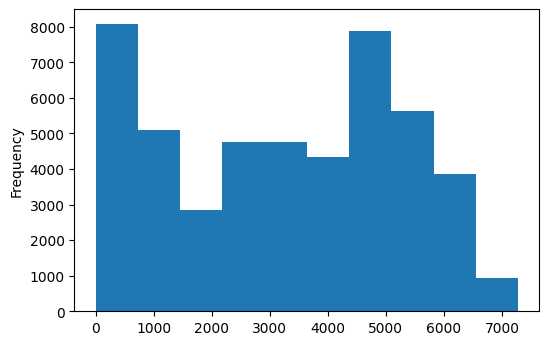

In [59]:
traffic['traffic_volume'].plot.hist()
traffic['traffic_volume'].describe()

Observations:
- About 25% of the time, 1193 cars or fewer pass the station each hour.
- About 25% of the time (in the upper 75 percentile), the amount of cars passing the station quadruple at 4933 cars or more.
- Both instance may be explained with time variance.  The lower 25% with fewer cars could be occuring during night, while the upper 25% could be occuring during the day around rush hour.

Let's continue by looking into the date_time column.  We will have to convert the column to a datetime object first, and then we can divide the dataset into two parts: <br>
Daytime 7am - 7pm <br>
Nighttime 7pm - 7am

In [60]:
# Convert date_time column to panda datetime object
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

# Daytime Traffic
traffic_day = traffic[(traffic['date_time'].dt.hour >= 7) 
                        & 
                        (traffic['date_time'].dt.hour < 19)]

#Nighttime traffic
traffic_night = traffic[(traffic['date_time'].dt.hour < 7) 
                      |
                      (traffic['date_time'].dt.hour >= 19)]

# Verify rows.  day traffic + night traffic = dataset traffic
print(traffic_night.shape)
print(traffic_day.shape)
print(traffic.shape)

(24327, 9)
(23877, 9)
(48204, 9)


Now that we have isolated daytime and nighttime traffic, lets compare the volume between both datasets:

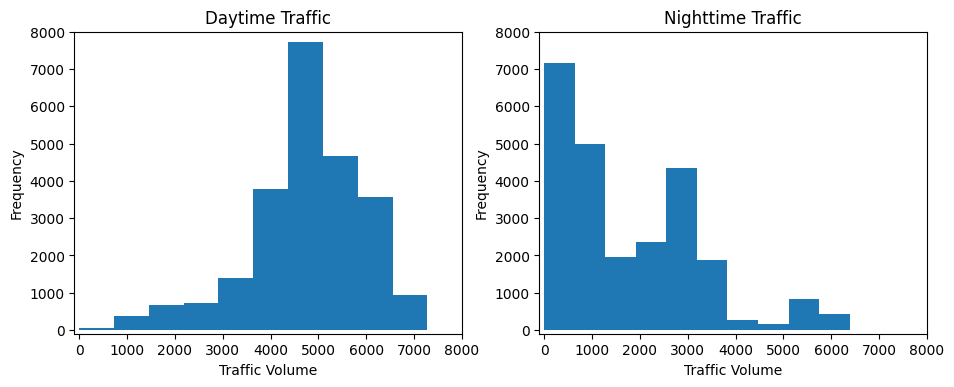

In [134]:
#Plot size
plt.figure(figsize = (11, 4))

#Daytime Traffic plot
plt.subplot(1, 2, 1)
plt.hist(traffic_day['traffic_volume'])
plt.ylim(-100, 8000)
plt.xlim(-100, 8000)
plt.title('Daytime Traffic')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

#Nighttime Traffic plot
plt.subplot(1, 2, 2)
plt.hist(traffic_night['traffic_volume'])
plt.ylim(-100, 8000)
plt.xlim(-100, 8000)
plt.title('Nighttime Traffic')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

In [83]:
# Statistics for daytime and nighttime traffic
print('Daytime Traffic')
print(traffic_day['traffic_volume'].describe())
print('\nNighttime Traffic')
print(traffic_night['traffic_volume'].describe())

Daytime Traffic
count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Nighttime Traffic
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


## Possible Heavy Traffic Indicator: Time
Based off of the histogram, most heavy traffic occurs during the day.  Nighttime traffic is generally light, so we will be moving forward with only the daytime traffic data. <br><br>
A possible indicator of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day. <br><br>
We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

### Month

<ipython-input-131-aa61abe5942f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



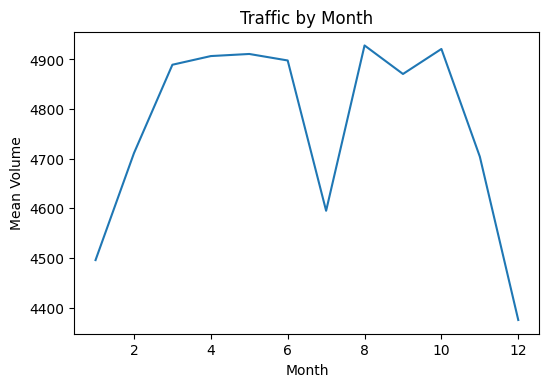

In [131]:
#Group By Month, Mean
traffic_day['month'] = traffic_day['date_time'].dt.month
by_month = traffic_day.groupby('month').mean()

#1 = Jan, 12 = Dec
plt.plot(by_month['traffic_volume'])
plt.title('Traffic by Month')
plt.xlabel('Month')
plt.ylabel('Mean Volume')
plt.show()

Obervations:
- January, July, and December months are exceptionally low.  This could be due to Summer season for July, and Holiday season for December and January.
- Fall and Spring seasons show the highest mean for traffic volume.

Lets explore further into:
### Days of the Week

<ipython-input-115-9ea8b29ff373>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



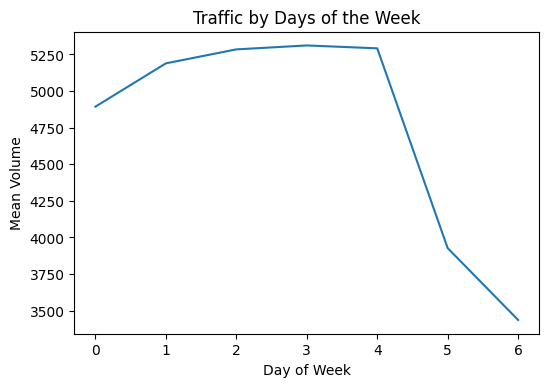

In [115]:
#Group by Day of the Week, Mean
traffic_day['dayofweek'] = traffic_day['date_time'].dt.dayofweek
by_dayofweek = traffic_day.groupby('dayofweek').mean()

# 0 is Monday, 6 is Sunday
plt.plot(by_dayofweek['traffic_volume'])
plt.title('Traffic by Days of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Mean Volume')
plt.show()

Observations:
- Days 0-4 (Monday - Friday) show high traffic mean.  This could be likely due to commuter heading to and from work.
- Days 5 and 6 (Saturday - Sunday) show low traffic as they are not considered business days.

Since traffic is heavier during business days, we will look at that and weekends seperately as they have very different averages.
### Time of Day
Below we breakdown the time of day by hour, and seperate them into business day and weekend plots:

<ipython-input-163-02e0068d3c0b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



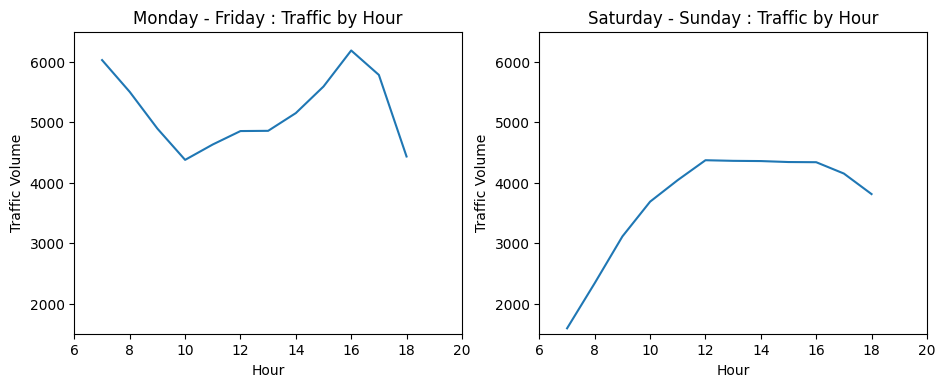

In [163]:
#Group by Traffic Time of Day
traffic_day['hour'] = traffic_day['date_time'].dt.hour
bussiness_days = traffic_day[traffic_day['dayofweek'] <= 4] # 4 == Friday
weekend = traffic_day[traffic_day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

#Plot Size
plt.figure(figsize = (11,4))

#Business Day Traffic Hour Plot
plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Monday - Friday : Traffic by Hour')
plt.ylim(1500, 6500)
plt.xlim(6, 20)
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')

#Weekend Traffic Hour Plot
plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Saturday - Sunday : Traffic by Hour')
plt.ylim(1500, 6500)
plt.xlim(6, 20)
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')

plt.show()

Observations:
- Business Day Rush hour peaks around 7am and 4pm,.
- Weekend Traffic is most present during the afternoon and evening hours.

## Weather

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume:

In [164]:
traffic_day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

### Temperature
In terms of weather, the strongest correlation above looks to be temp.  Lets plot that and see if there are any trends:

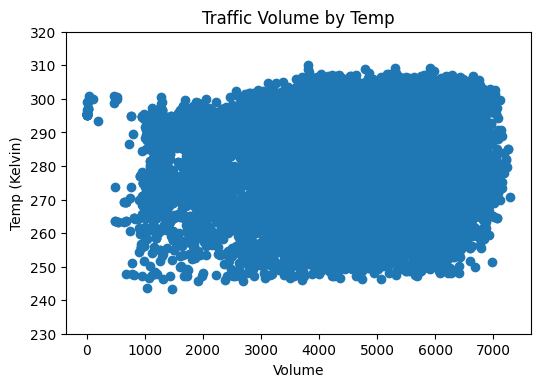

In [165]:
# Traffic volume by temperature plot
plt.scatter(traffic_day['traffic_volume'],traffic_day['temp'])
plt.title('Traffic Volume by Temp')
plt.ylim(230, 320) #Excluding two data points that show 0K temp.
plt.ylabel('Temp (Kelvin)')
plt.xlabel('Volume')
plt.show()

From the plot above, It does not look like the temp is showing any indication of heavy traffic.
### Weather Types
To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.

Let's create a bar plot for the traffic_volume column of by_weather_main and by_weather_description.

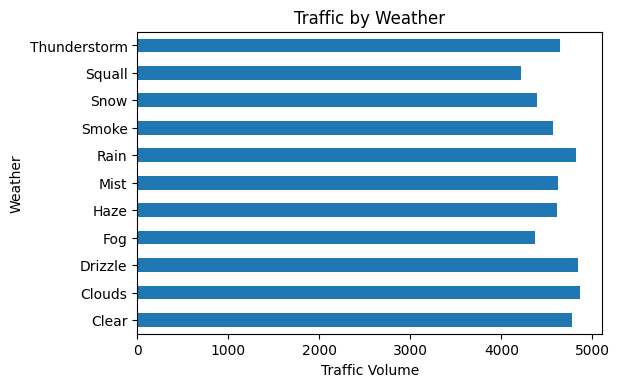

In [166]:
#Group by weather type and description
by_weather_main = traffic_day.groupby('weather_main').mean()
by_weather_description = traffic_day.groupby('weather_description').mean()

# Traffic volume by weather type plot
plot = by_weather_main['traffic_volume'].plot.barh(title = 'Traffic by Weather')
plot.set_xlabel('Traffic Volume')
plot.set_ylabel('Weather')
plt.show()

It does not look like there are any traffic volumes above 5000 (rush hour), showing no indication of heavy traffic from weather types.

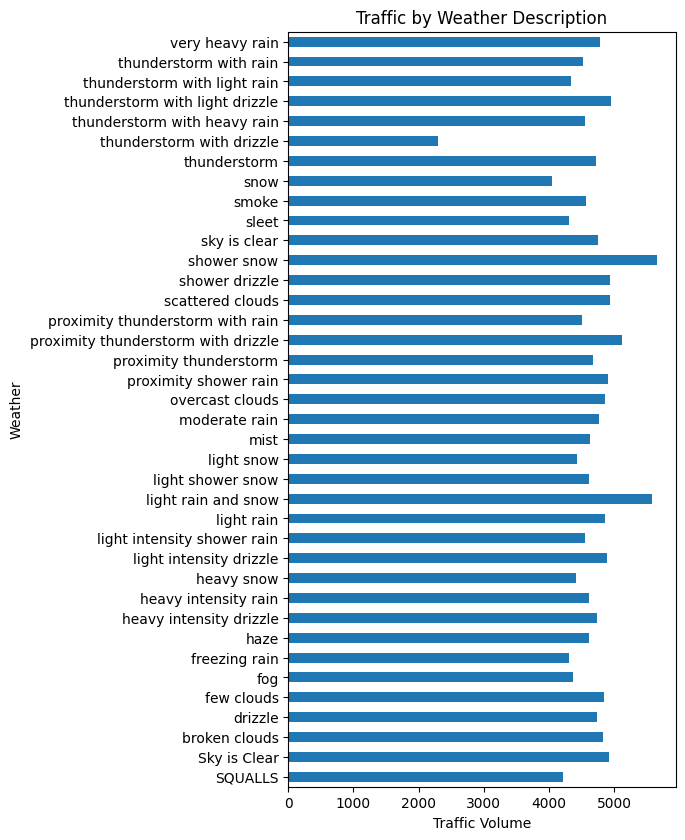

In [171]:
# Traffic volume by weather description
plot = by_weather_description['traffic_volume'].plot.barh(title = 'Traffic by Weather Description',
                                                         figsize=(5, 10))
plot.set_xlabel('Traffic Volume')
plot.set_ylabel('Weather')
plt.show()

Observations:
There are three specific weather types that exceed in 5000 traffic volume:
- Shower Nnow
- Proximity Thunderstorm with Drizzle
- Light Rain and Snow

Although these types exceed 5000, it isn't clear why only it is only these specific types.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway.

We managed to find two types of indicators:

- Time indicators
    - Traffic is usually heavier during the warmer seasons (Spring Summer Fall) compared to colder seasons (Winter)
    - Traffic is heavier on business days compared to weekends due to work commuters
    - Business Day rush hour peaks around 7am and 4pm
- Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle